# FASHION MNIST
- cpu based pytorch implementation of ANN
- we will consider a subset of 6000 images out of 70k images as we are not using GPU

# architechture of our ann

- input layer (784 nodes as we have 784 features)
- 1st hidden layer (128 neurons) relu
- 2nd hidden layer (64 neurons) relu
- output layer (10 neurons) softmax

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader , Dataset

In [2]:
# set random seed
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv', on_bad_lines='skip')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


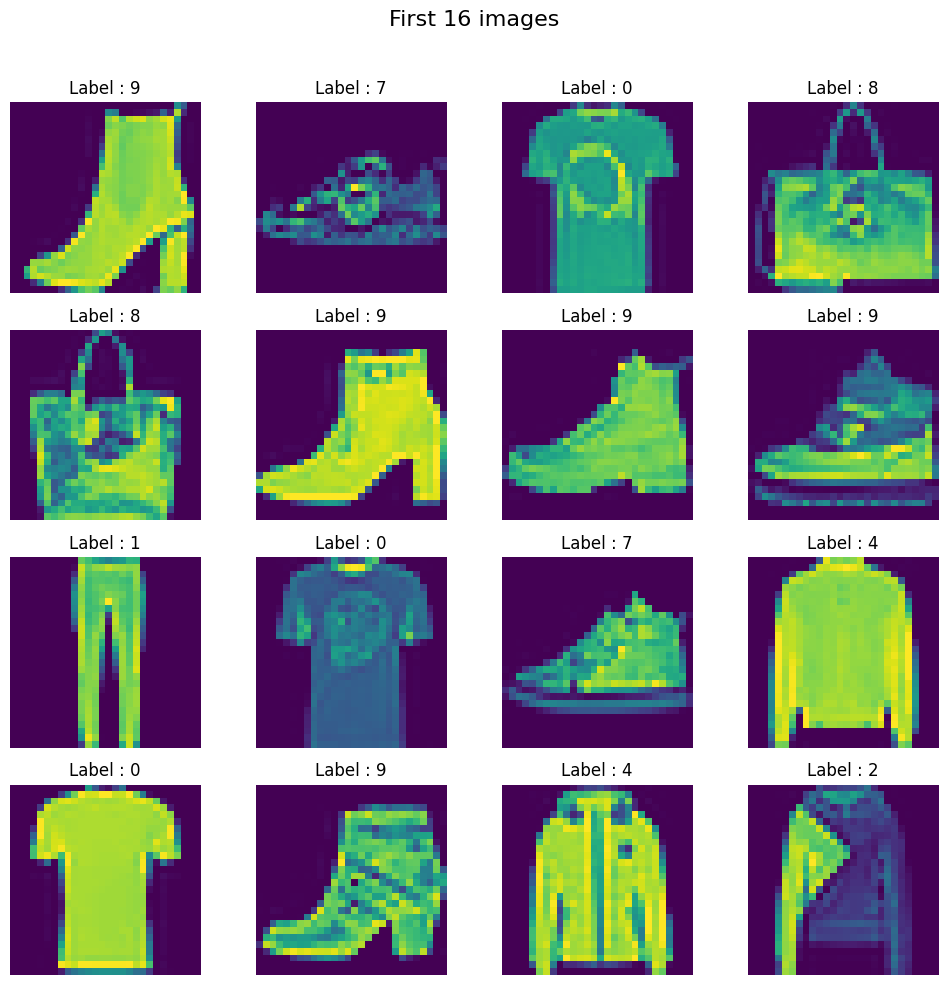

In [4]:
# 4x4 grid of images
fig , axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images" , fontsize=16)

# plot 1st 16 images
for i , ax in enumerate(axes.flat):
    img = df.iloc[i , 1:].values.reshape(28,28)
    ax.imshow(img) # grayscale
    ax.axis('off') # remove axis for cleaner look
    ax.set_title(f"Label : {df.iloc[i , 0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [5]:
# multiclass classification

X = df.iloc[: , 1:].values
y = df.iloc[: , 0].values

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [7]:
# feature scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [9]:
# custom dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
      self.features = torch.tensor(features,dtype=torch.float32)
      self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
      return len(self.features)

  def __getitem__(self, index):
      return self.features[index] , self.labels[index]

In [10]:
# train dataset object
train_dataset = CustomDataset(X_train , y_train)
len(train_dataset)

4800

In [11]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# test dataset
test_dataset = CustomDataset(X_test , y_test)
len(test_dataset)

1200

In [13]:
# train and test loader
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True)
test_loader = DataLoader(test_dataset , batch_size=32 , shuffle=False)

In [14]:
# define NN class

class MyNN(nn.Module):
  def __init__(self , num_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features , 128),
        nn.ReLU(),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Linear(64 , 10),
    )
    # no need of explicitly defining softmax as it is implemented by default in binary cross entropy loss

  def forward(self , x):
    return self.model(x)

In [15]:
# learning rate and epochs
epochs = 100
learning_rate = 0.1

In [16]:
# instantiate the model
model = MyNN(X_train.shape[1])

# loss fun
criterion = nn.CrossEntropyLoss()

# OPTIMIZER
optimizer = optim.SGD(model.parameters() , lr=learning_rate)

In [17]:
len(train_loader)

150

In [18]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.3216368528207143
Epoch: 2 , Loss: 0.7793365389108657
Epoch: 3 , Loss: 0.6427524648110072
Epoch: 4 , Loss: 0.5751657428344091
Epoch: 5 , Loss: 0.5281802035371462
Epoch: 6 , Loss: 0.49528750280539197
Epoch: 7 , Loss: 0.4602432996034622
Epoch: 8 , Loss: 0.435945917169253
Epoch: 9 , Loss: 0.41829213748375577
Epoch: 10 , Loss: 0.39840924287835755
Epoch: 11 , Loss: 0.3850264524420102
Epoch: 12 , Loss: 0.37226856033007305
Epoch: 13 , Loss: 0.34775472511847816
Epoch: 14 , Loss: 0.34747447177767754
Epoch: 15 , Loss: 0.31615055337548253
Epoch: 16 , Loss: 0.31182024608055753
Epoch: 17 , Loss: 0.2919234921534856
Epoch: 18 , Loss: 0.2852401979267597
Epoch: 19 , Loss: 0.2716610049704711
Epoch: 20 , Loss: 0.2620930323501428
Epoch: 21 , Loss: 0.2573009904225667
Epoch: 22 , Loss: 0.2422846657037735
Epoch: 23 , Loss: 0.2393271365016699
Epoch: 24 , Loss: 0.22775985998411974
Epoch: 25 , Loss: 0.224474375123779
Epoch: 26 , Loss: 0.21341036995251975
Epoch: 27 , Loss: 0.21635652792950472
E

In [19]:
# model eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
len(test_loader)

38

In [22]:
 # eval code

 total = 0
 correct = 0

 with torch.no_grad():
  for batch_features , batch_labels in test_loader:
    outputs = model(batch_features)
    # extract labels
    predicted = torch.max(outputs , 1)

    total += batch_labels.shape[0]
    correct += (predicted.indices == batch_labels).sum().item()

print(f'Accuracy : {correct/total}')




Accuracy : 0.8291666666666667
